In [37]:
import torch
import torch.nn as nn
from datasets import load_dataset
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchgpipe import GPipe
from transformers import GPT2Tokenizer, GPT2LMHeadModel
#from transformers.models.gpt2.modeling_gpt2 import GPT2Block as GPT2BlockBase
from transformers.models.gpt2.modeling_gpt2 import GPT2Block 

In [38]:
datasets = load_dataset("squad")
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [39]:
datasets["train"][0]

{'id': '5733be284776f41900661182',
 'title': 'University_of_Notre_Dame',
 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?',
 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}

In [40]:
datasets = load_dataset("squad").data["train"]["context"]
print(type(datasets))
print(len(datasets))
data_loader = DataLoader(datasets, batch_size=8, num_workers=8)
print(data_loader)
#batch = next(iter(data_loader))
#batch
#ERROR: batch must contain tensors, numpy arrays, numbers, dicts or lists; 
#found <class 'pyarrow.lib.StringScalar'>

<class 'pyarrow.lib.ChunkedArray'>
87599


In [41]:
datasets = load_dataset("squad").data["train"]["context"]
print(type(datasets))
datasets = [str(sample) for sample in datasets]
print(type(datasets))
data_loader = DataLoader(datasets, batch_size=6, num_workers=8)
for data in data_loader:
    break
data

<class 'pyarrow.lib.ChunkedArray'>
<class 'list'>


['Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building

In [42]:
datasets = load_dataset("squad", split="train")
print(type(datasets))
print(len(datasets))
data_loader = DataLoader(datasets, batch_size=2, num_workers=8) #dataset ==> Dataset
batch = next(iter(data_loader))
print(type(batch)) 
print(type(batch["context"]))
batch

<class 'datasets.arrow_dataset.Dataset'>
87599
<class 'dict'>
<class 'list'>


{'id': ['5733be284776f41900661182', '5733be284776f4190066117f'],
 'title': ['University_of_Notre_Dame', 'University_of_Notre_Dame'],
 'context': ['Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
  'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front o

In [43]:
datasets = load_dataset("squad", split="train")["context"]
print(type(datasets))
print(len(datasets))
data_loader = DataLoader(datasets, batch_size=2, num_workers=8) #dataset ==> class list
batch = next(iter(data_loader))
batch

<class 'list'>
87599


['Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building

In [44]:
datasets = load_dataset("squad").data["train"]["context"]
print(type(datasets))
datasets = [sample for sample in datasets]
print(type(datasets))
print(len(datasets))
data_loader = DataLoader(datasets, batch_size=2, num_workers=8)
print(data_loader)
#batch = next(iter(data_loader))
#batch
#batch must contain tensors, numpy arrays, numbers, dicts or lists; 
#found <class 'pyarrow.lib.StringScalar'>

<class 'pyarrow.lib.ChunkedArray'>
<class 'list'>
87599


In [45]:
datasets = load_dataset("squad").data["train"]["context"]
print(type(datasets))
datasets = [str(sample) for sample in datasets]
print(type(datasets))
print(len(datasets))
data_loader = DataLoader(datasets, batch_size=6, num_workers=8)
data = next(iter(data_loader))
data

<class 'pyarrow.lib.ChunkedArray'>
<class 'list'>
87599


['Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.',
 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building

In [46]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
tokenizer

GPT2Tokenizer(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

In [47]:
token = tokenizer(data, return_tensors="pt", truncation=True, padding=True)
print(token)
print([len(x) for x in token["input_ids"]])

{'input_ids': tensor([[19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [ 1722,   379,   749,  ...,   663,  8886,    13]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])}
[261, 261, 261, 261, 261, 261]


In [48]:
datasets = load_dataset("squad")
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [49]:
datasets.set_format("pandas")
df = datasets["train"][:]
df

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...
...,...,...,...,...,...
87594,5735d259012e2f140011a09d,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,"{'text': ['Oregon'], 'answer_start': [229]}"
87595,5735d259012e2f140011a09e,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,"{'text': ['Rangoon'], 'answer_start': [414]}"
87596,5735d259012e2f140011a09f,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,"{'text': ['Minsk'], 'answer_start': [476]}"
87597,5735d259012e2f140011a0a0,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,"{'text': ['1975'], 'answer_start': [199]}"


In [50]:
df.count()

id          87599
title       87599
context     87599
question    87599
answers     87599
dtype: int64

In [51]:
#print(sorted([len(x) for x in df["context"]], reverse=True) )

In [52]:
df['context_len'] = [len(x.split()) for x in df["context"]]
df

,id,title,context,question,answers,context_len
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"{'text': ['Saint Bernadette Soubirous'], 'answ...",124
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"{'text': ['a copper statue of Christ'], 'answe...",124
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"{'text': ['the Main Building'], 'answer_start'...",124
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,{'text': ['a Marian place of prayer and reflec...,124
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,{'text': ['a golden statue of the Virgin Mary'...,124
...,...,...,...,...,...,...
87594,5735d259012e2f140011a09d,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,"{'text': ['Oregon'], 'answer_start': [229]}",110
87595,5735d259012e2f140011a09e,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,"{'text': ['Rangoon'], 'answer_start': [414]}",110
87596,5735d259012e2f140011a09f,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,"{'text': ['Minsk'], 'answer_start': [476]}",110
87597,5735d259012e2f140011a0a0,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,"{'text': ['1975'], 'answer_start': [199]}",110


<Axes: >

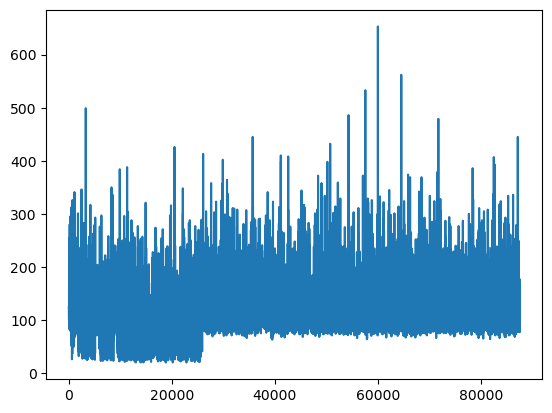

In [53]:
%matplotlib inline
df["context_len"].plot()

In [54]:
df["context_len"].sort_values(ascending=False)[:30]

60027    653
60026    653
60025    653
60023    653
60024    653
64567    562
64569    562
64568    562
64571    562
64570    562
57587    533
57588    533
57586    533
57589    533
57590    533
3275     499
3276     499
3274     499
3273     499
54332    486
54335    486
54331    486
54334    486
54333    486
71776    479
71772    479
71775    479
71773    479
71774    479
87199    445
Name: context_len, dtype: int64

In [55]:
df.sort_values(by=["context_len"], ascending=False, inplace=True)
df

,id,title,context,question,answers,context_len
60027,5728c4163acd2414000dfde3,Sahara,The sky is usually clear above the desert and ...,During daytime how high can the temperatures r...,"{'text': ['80 °C (176 °F)'], 'answer_start': [...",653
60026,5728c4163acd2414000dfde2,Sahara,The sky is usually clear above the desert and ...,What is the annual average direct solar irradi...,"{'text': ['around 2,800 kWh/(m2 year)'], 'answ...",653
60025,5728c4163acd2414000dfde1,Sahara,The sky is usually clear above the desert and ...,What percent of time is the sun generally over...,"{'text': ['82% of the time'], 'answer_start': ...",653
60023,5728c4163acd2414000dfddf,Sahara,The sky is usually clear above the desert and ...,What is the largest hottest continuously large...,"{'text': ['the Great Desert'], 'answer_start':...",653
60024,5728c4163acd2414000dfde0,Sahara,The sky is usually clear above the desert and ...,What is the value temperature of most of the d...,"{'text': ['25 °C'], 'answer_start': [2601]}",653
...,...,...,...,...,...,...
14482,56e0455c231d4119001ac023,Aspirated_consonant,Preaspirated consonants are marked by placing ...,A preaspirated consonant is marked how?,{'text': ['placing the aspiration modifier let...,20
12997,56df47ad8bc80c19004e49ee,Hunter-gatherer,Only a few contemporary societies are classifi...,"Besides agriculture, how do gatherers add to ...","{'text': ['keeping animals'], 'answer_start': ...",20
13935,56dfb9837aa994140058e084,Internet_service_provider,Internet services typically provided by ISPs i...,What are some services provided by an isp?,"{'text': ['Internet access, Internet transit, ...",20
18836,56f74992a6d7ea1400e17164,Slavs,^10 Sub-groups of Slovenes include Prekmurians...,What sub-groups of Slovenes are extinct?,"{'text': ['Carantanians and Somogy Slovenes'],...",20


In [56]:
datasets.reset_format()
datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 10570
    })
})

In [57]:
from datasets import Dataset

datasetss = Dataset.from_pandas(df)
datasetss

Dataset({
    features: ['id', 'title', 'context', 'question', 'answers', 'context_len', '__index_level_0__'],
    num_rows: 87599
})

In [58]:
datasetss[:6]["context_len"]

[653, 653, 653, 653, 653, 562]

In [59]:
datasets["train"][0]["context"]

'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.'

In [60]:
token = tokenizer(datasetss[0]["context"])
len(token["input_ids"])

878

In [61]:
def tokenize_function(element):
    outputs = tokenizer(
        element["context"],
        truncation=True,
    )
    return outputs
    

In [62]:

tokenized_datasets = datasets.map(tokenize_function, batched=True, remove_columns= datasets["train"].column_names)
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 10570
    })
})

In [63]:

tokenized_datasets = datasets.map(lambda x: tokenizer(x["context"], truncation=True), batched=True, remove_columns= datasets["train"].column_names)
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 87599
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 10570
    })
})

In [64]:
print(tokenized_datasets["train"])
print(type(tokenized_datasets["train"][:10]))
print(tokenized_datasets["train"][:2])

Dataset({
    features: ['input_ids', 'attention_mask'],
    num_rows: 87599
})
<class 'dict'>
{'input_ids': [[19895, 5712, 20221, 11, 262, 1524, 468, 257, 7835, 2095, 13, 1629, 404, 262, 8774, 11819, 338, 3869, 29500, 318, 257, 10861, 15207, 286, 262, 5283, 5335, 13, 34528, 287, 2166, 286, 262, 8774, 11819, 290, 6476, 340, 11, 318, 257, 15317, 15207, 286, 1951, 351, 5101, 510, 49309, 351, 262, 8177, 366, 37522, 578, 1215, 2185, 16543, 2516, 1911, 7406, 284, 262, 8774, 11819, 318, 262, 32520, 3970, 286, 262, 17380, 8894, 13, 34528, 2157, 262, 37792, 3970, 318, 262, 10299, 33955, 11, 257, 37919, 1295, 286, 11443, 290, 14580, 13, 632, 318, 257, 30069, 286, 262, 7128, 33955, 379, 406, 454, 8906, 11, 4881, 810, 262, 5283, 5335, 1128, 7241, 306, 4120, 284, 9281, 6206, 324, 5857, 311, 12944, 343, 516, 287, 1248, 3365, 13, 1629, 262, 886, 286, 262, 1388, 3708, 357, 392, 287, 257, 1277, 1627, 326, 20417, 832, 513, 25827, 290, 262, 3561, 31390, 828, 318, 257, 2829, 11, 3660, 7815, 15207, 286, 5

In [65]:
print(max([len(x) for x in tokenized_datasets["train"]["input_ids"]]))

878


In [66]:
samples = tokenized_datasets["train"][:2]
print(samples)
samples = {k: v for k, v in samples.items()}
print(samples)
[len(x) for x in samples["input_ids"]]

{'input_ids': [[19895, 5712, 20221, 11, 262, 1524, 468, 257, 7835, 2095, 13, 1629, 404, 262, 8774, 11819, 338, 3869, 29500, 318, 257, 10861, 15207, 286, 262, 5283, 5335, 13, 34528, 287, 2166, 286, 262, 8774, 11819, 290, 6476, 340, 11, 318, 257, 15317, 15207, 286, 1951, 351, 5101, 510, 49309, 351, 262, 8177, 366, 37522, 578, 1215, 2185, 16543, 2516, 1911, 7406, 284, 262, 8774, 11819, 318, 262, 32520, 3970, 286, 262, 17380, 8894, 13, 34528, 2157, 262, 37792, 3970, 318, 262, 10299, 33955, 11, 257, 37919, 1295, 286, 11443, 290, 14580, 13, 632, 318, 257, 30069, 286, 262, 7128, 33955, 379, 406, 454, 8906, 11, 4881, 810, 262, 5283, 5335, 1128, 7241, 306, 4120, 284, 9281, 6206, 324, 5857, 311, 12944, 343, 516, 287, 1248, 3365, 13, 1629, 262, 886, 286, 262, 1388, 3708, 357, 392, 287, 257, 1277, 1627, 326, 20417, 832, 513, 25827, 290, 262, 3561, 31390, 828, 318, 257, 2829, 11, 3660, 7815, 15207, 286, 5335, 13], [19895, 5712, 20221, 11, 262, 1524, 468, 257, 7835, 2095, 13, 1629, 404, 262, 8774, 1

[160, 160]

In [67]:
print(type(tokenized_datasets["train"][:]))
type(tokenized_datasets["train"])

<class 'dict'>


datasets.arrow_dataset.Dataset

In [68]:
from transformers import DataCollatorWithPadding

# dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [69]:
batch = data_collator(tokenized_datasets["train"][:])
# dynamic padding with the entire datasets
{k: v.shape for k, v in batch.items()}

{'input_ids': torch.Size([87599, 878]),
 'attention_mask': torch.Size([87599, 878])}

In [70]:
type(batch)
batch

{'input_ids': tensor([[19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        ...,
        [   42,   776, 22249,  ..., 50256, 50256, 50256],
        [   42,   776, 22249,  ..., 50256, 50256, 50256],
        [   42,   776, 22249,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [71]:
batch[:2]

{'input_ids': tensor([[19895,  5712, 20221,  ..., 50256, 50256, 50256],
         [19895,  5712, 20221,  ..., 50256, 50256, 50256]]),
 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]])}

In [72]:
dataloader = DataLoader(
    batch, batch_size=8, #collate_fn=data_collator
)
for batch in dataloader:
    break
print(batch)
{k: v.shape for k, v in batch.items()}

KeyError: 'Invalid key. Only three types of key are available: (1) string, (2) integers for backend Encoding, and (3) slices for data subsetting.'

In [73]:
datasets = load_dataset("squad")

def tokenize_function(element):
    outputs = tokenizer(
        element["context"],
        truncation=True,
    )
    return outputs

tokenized_datasets = datasets.map(tokenize_function, batched=True, remove_columns= datasets["train"].column_names)

from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=24, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=24, collate_fn=data_collator
)

In [74]:
for batch in train_dataloader:
    break
print(batch)
{k: v.shape for k, v in batch.items()}

{'input_ids': tensor([[ 4366, 17336,   286,  ..., 50256, 50256, 50256],
        [ 8579,  6173,    82,  ..., 50256, 50256, 50256],
        [  464, 15075,  1321,  ..., 50256, 50256, 50256],
        ...,
        [  464,  8997, 25235,  ..., 50256, 50256, 50256],
        [   32,  4996,   286,  ..., 50256, 50256, 50256],
        [   32, 14813,   292,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


{'input_ids': torch.Size([24, 391]), 'attention_mask': torch.Size([24, 391])}

In [75]:
datasets = load_dataset("squad")

def tokenize_function(element):
    outputs = tokenizer(
        element["context"],
        truncation=True,
    )
    return outputs

tokenized_datasets = datasets.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(datasets["train"].column_names)

from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=24, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=24, collate_fn=data_collator
)

In [76]:
for batch in train_dataloader:
    break
print(batch)
{k: v.shape for k, v in batch.items()}

{'input_ids': tensor([[  464,  1573,  9779,  ..., 50256, 50256, 50256],
        [   32,  4165,  4007,  ..., 50256, 50256, 50256],
        [20457,  4371,  3812,  ..., 50256, 50256, 50256],
        ...,
        [ 1026,   373,   379,  ..., 50256, 50256, 50256],
        [   41, 17231,   709,  ..., 50256, 50256, 50256],
        [29874,  7778,   959,  ..., 50256, 50256, 50256]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


{'input_ids': torch.Size([24, 405]), 'attention_mask': torch.Size([24, 405])}

In [77]:
batch.input_ids

tensor([[  464,  1573,  9779,  ..., 50256, 50256, 50256],
        [   32,  4165,  4007,  ..., 50256, 50256, 50256],
        [20457,  4371,  3812,  ..., 50256, 50256, 50256],
        ...,
        [ 1026,   373,   379,  ..., 50256, 50256, 50256],
        [   41, 17231,   709,  ..., 50256, 50256, 50256],
        [29874,  7778,   959,  ..., 50256, 50256, 50256]])

In [78]:
model_name = "gpt2"
pretrained = GPT2LMHeadModel.from_pretrained(model_name)

In [79]:
print(pretrained)

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)


In [80]:
print(pretrained.config)
print(dir(pretrained.config))

GPT2Config {
  "_name_or_path": "gpt2",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "embd_pdrop": 0.1,
  "eos_token_id": 50256,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
  },
  "transformers_version": "4.40.0.dev0",
  "use_cache": true,
  "vocab_size": 50257
}

['__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__'

In [81]:
class GPT2Preprocessing(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.embed_dim = config.hidden_size
        self.wte = nn.Embedding(config.vocab_size, self.embed_dim)
        self.wpe = nn.Embedding(config.max_position_embeddings, self.embed_dim)
        self.drop = nn.Dropout(config.embd_pdrop)

    def forward(self, input_ids):
        input_shape = input_ids.size()
        print(input_shape)
        input_ids = input_ids.view(-1, input_shape[-1])
        position_ids = torch.arange(
            0, input_shape[-1], dtype=torch.long, device=input_ids.device
        )
        position_ids = position_ids.unsqueeze(0).view(-1, input_shape[-1])
        inputs_embeds = self.wte(input_ids)
        position_embeds = self.wpe(position_ids)
        hidden_states = inputs_embeds + position_embeds
        hidden_states = self.drop(hidden_states)
        return hidden_states

In [82]:
pretrained

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [83]:
pretrained.transformer

GPT2Model(
  (wte): Embedding(50257, 768)
  (wpe): Embedding(1024, 768)
  (drop): Dropout(p=0.1, inplace=False)
  (h): ModuleList(
    (0-11): 12 x GPT2Block(
      (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): GPT2Attention(
        (c_attn): Conv1D()
        (c_proj): Conv1D()
        (attn_dropout): Dropout(p=0.1, inplace=False)
        (resid_dropout): Dropout(p=0.1, inplace=False)
      )
      (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): GPT2MLP(
        (c_fc): Conv1D()
        (c_proj): Conv1D()
        (act): NewGELUActivation()
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
)

In [84]:
blocks = pretrained.transformer.h

In [85]:
#blocks

In [86]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

#model = create_model_from_pretrained(model_name="gpt2")

In [87]:
tokens = tokenizer(data, return_tensors="pt", truncation=True, padding=True)
#tokens

In [88]:
input_ids = tokens["input_ids"]
input_shape = input_ids.size()
input_shape

torch.Size([6, 261])

In [89]:
a = torch.ones(2,3,4)
print(a)
print(a.view(-1, a.size()[-1]))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [90]:
a = torch.ones(2,3,4)
print(a.unsqueeze(0).shape)
a.unsqueeze(0).view(-1, a.shape[-1]).shape

torch.Size([1, 2, 3, 4])


torch.Size([6, 4])

In [91]:
position_ids = torch.arange(
            0, input_shape[-1], dtype=torch.long, device=input_ids.device
        )
print(position_ids.shape)
print(position_ids.unsqueeze(0).shape)
position_ids.unsqueeze(0).view(-1, input_shape[-1]).shape

torch.Size([261])
torch.Size([1, 261])


torch.Size([1, 261])

In [92]:
#pretrained = GPT2LMHeadModel.from_pretrained("gpt2")

In [93]:
#pretrained.transformer

In [94]:
class GPT2Preprocessing(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.embed_dim = config.hidden_size
        self.wte = nn.Embedding(config.vocab_size, self.embed_dim)
        self.wpe = nn.Embedding(config.max_position_embeddings, self.embed_dim)
        self.drop = nn.Dropout(config.embd_pdrop)
        #print("GPT2Pre Init")

    def forward(self, input_ids):
        input_shape = input_ids.size()
        input_ids = input_ids.view(-1, input_shape[-1])
        position_ids = torch.arange(
            0, input_shape[-1], dtype=torch.long, device=input_ids.device
        )
        position_ids = position_ids.unsqueeze(0).view(-1, input_shape[-1])
        inputs_embeds = self.wte(input_ids)
        position_embeds = self.wpe(position_ids)
        hidden_states = inputs_embeds + position_embeds
        #hidden_states = self.drop(hidden_states)
        return hidden_states


class MyGPT2Block(GPT2Block): 
    def __init__(self):
        print("GPT2Block init")
        
    def forward(self, hidden_states):
        #print(hidden_states)
        parents_class = super(MyGPT2Block, self)
        #parents_class = super(MyGPT2Block) #AttributeError: 'super' object has no attribute 'forward'
        #<class 'transformers.models.gpt2.modeling_gpt2.GPT2Block'>
        #print(parents_class) #<super: <class 'MyGPT2Block'>, <MyGPT2Block object>>
        
        hidden_states = parents_class.forward(
        #hidden_states = super(MyGPT2Block, self).forward(
            hidden_states=hidden_states,
        )
        return hidden_states[0]


class GPT2Postprocessing(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.ln_f = nn.LayerNorm(
            config.hidden_size,
            eps=config.layer_norm_epsilon,
        )
        self.lm_head = nn.Linear(
            config.hidden_size,
            config.vocab_size,
            bias=False,
        )
        #print("GPT2Post Init")

    def forward(self, hidden_states):
        #print(hidden_states)
        hidden_states = self.ln_f(hidden_states)
        lm_logits = self.lm_head(hidden_states)
        return lm_logits


def create_model_from_pretrained(model_name):
    pretrained = GPT2LMHeadModel.from_pretrained(model_name)
    preprocess = GPT2Preprocessing(pretrained.config)
    preprocess.wte.weight = pretrained.transformer.wte.weight
    preprocess.wpe.weight = pretrained.transformer.wpe.weight

    blocks = pretrained.transformer.h
    for block in blocks:
        block.__class__ = MyGPT2Block
    #blocks = pretrained.transformer.h[0]
    #print(type(blocks)) #<class 'transformers.models.gpt2.modeling_gpt2.GPT2Block'>
    #blocks.__class__ = MyGPT2Block #change the class of the object to <class __main__.MyGPT2Block>
    #print(blocks)

    postprocess = GPT2Postprocessing(pretrained.config)
    postprocess.ln_f.weight = pretrained.transformer.ln_f.weight
    postprocess.ln_f.bias = pretrained.transformer.ln_f.bias
    #postprocess.lm_head.weight.data = pretrained.lm_head.weight.data.clone()
    postprocess.lm_head.weight = pretrained.lm_head.weight.clone()

    model = nn.Sequential(preprocess, *blocks, postprocess)
    #model = nn.Sequential(preprocess, blocks, postprocess)
    #print(model)
    #print(blocks)
    #return nn.Sequential(preprocess, *blocks, postprocess)
    return(model)

In [95]:
class GPT2Preprocessing(nn.Module):
    def __init__(self, config):
        #print(config)
        #print(dir(config))
        super().__init__()
        self.embed_dim = config.hidden_size
        self.wte = nn.Embedding(config.vocab_size, self.embed_dim)
        #self.wpe = nn.Embedding(config.max_position_embeddings, self.embed_dim)
        self.wpe = nn.Embedding(config.n_positions, self.embed_dim)
        self.drop = nn.Dropout(config.embd_pdrop)
        #print("GPT2Pre Init")

    def forward(self, input_ids):
        input_shape = input_ids.size()
        input_ids = input_ids.view(-1, input_shape[-1])
        position_ids = torch.arange(
            0, input_shape[-1], dtype=torch.long, device=input_ids.device
        )
        position_ids = position_ids.unsqueeze(0).view(-1, input_shape[-1])
        inputs_embeds = self.wte(input_ids)
        position_embeds = self.wpe(position_ids)
        hidden_states = inputs_embeds + position_embeds
        #hidden_states = self.drop(hidden_states)
        return hidden_states


class MyGPT2Block(GPT2Block): 
    def __init__(self, config):
        super().__init__(config) #def __init__(self, config, layer_idx=None)
        #print("GPT2Block init")

    def forward(self, hidden_states):
        #print(hidden_states)
        parents_class = super(MyGPT2Block, self)
        #parents_class = super(MyGPT2Block) #AttributeError: 'super' object has no attribute 'forward'
        #<class 'transformers.models.gpt2.modeling_gpt2.GPT2Block'>
        #print(parents_class) #<super: <class 'MyGPT2Block'>, <MyGPT2Block object>>

        #hidden_states = super(MyGPT2Block, self).forward(
        hidden_states = parents_class.forward(
            hidden_states=hidden_states,
        )
        return hidden_states[0]

class GPT2Postprocessing(nn.Module):
    def __init__(self, config):
        super().__init__() 
        self.ln_f = nn.LayerNorm(
            config.hidden_size,
            eps=config.layer_norm_epsilon,
        )
        self.lm_head = nn.Linear(
            config.hidden_size,
            config.vocab_size,
            bias=False,
        )
        #print("GPT2Post Init")

    def forward(self, hidden_states):
        #print(hidden_states)
        hidden_states = self.ln_f(hidden_states)
        lm_logits = self.lm_head(hidden_states)
        return lm_logits


def create_model_from_pretrained(model_name):
    pretrained = GPT2LMHeadModel.from_pretrained(model_name)
    preprocess = GPT2Preprocessing(pretrained.config)
    preprocess.wte.weight = pretrained.transformer.wte.weight
    preprocess.wpe.weight = pretrained.transformer.wpe.weight

    #block = MyGPT2Block(pretrained.config)
    #blocks = [block for _ in range(12)]
    blocks = []
    for _ in range(12):
        block = MyGPT2Block(pretrained.config)
        blocks.append(block)
    
    #for block in blocks:
    #    block.__class__ = MyGPT2Block
    #blocks = pretrained.transformer.h
    #for block in blocks:
    #    block.__class__ = MyGPT2Block
    
    #blocks = pretrained.transformer.h[0]
    #print(type(blocks)) #<class 'transformers.models.gpt2.modeling_gpt2.GPT2Block'>
    #blocks.__class__ = MyGPT2Block #change the class of the object to <class __main__.MyGPT2Block>
    #print(blocks)

    postprocess = GPT2Postprocessing(pretrained.config)
    postprocess.ln_f.weight = pretrained.transformer.ln_f.weight
    postprocess.ln_f.bias = pretrained.transformer.ln_f.bias
    postprocess.lm_head.weight.data = pretrained.lm_head.weight.data.clone()

    model = nn.Sequential(preprocess, *blocks, postprocess)
    #model = nn.Sequential(preprocess, blocks, postprocess)
    #print(model)
    #print(blocks)
    #return nn.Sequential(preprocess, *blocks, postprocess)
    return(model)

In [96]:
model = create_model_from_pretrained(model_name="gpt2")
print(model)

Sequential(
  (0): GPT2Preprocessing(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
  )
  (1): MyGPT2Block(
    (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (attn): GPT2Attention(
      (c_attn): Conv1D()
      (c_proj): Conv1D()
      (attn_dropout): Dropout(p=0.1, inplace=False)
      (resid_dropout): Dropout(p=0.1, inplace=False)
    )
    (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (mlp): GPT2MLP(
      (c_fc): Conv1D()
      (c_proj): Conv1D()
      (act): NewGELUActivation()
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (2): MyGPT2Block(
    (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (attn): GPT2Attention(
      (c_attn): Conv1D()
      (c_proj): Conv1D()
      (attn_dropout): Dropout(p=0.1, inplace=False)
      (resid_dropout): Dropout(p=0.1, inplace=False)
    )
    (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (mlp): GP

In [97]:
print(model[1].attn.c_attn.weight.shape, model[1].attn.c_attn.bias.shape)
print(model[1].attn.c_proj.weight.shape, model[1].attn.c_proj.bias.shape)

torch.Size([768, 2304]) torch.Size([2304])
torch.Size([768, 768]) torch.Size([768])


In [98]:
print(model[1].mlp.c_fc.weight.shape, model[1].mlp.c_fc.bias.shape)
print(model[1].mlp.c_proj.weight.shape, model[1].mlp.c_proj.bias.shape)

torch.Size([768, 3072]) torch.Size([3072])
torch.Size([3072, 768]) torch.Size([768])


In [99]:
tokens = tokenizer(data, return_tensors="pt", truncation=True, padding=True)
input_ids = tokens.input_ids
labels = tokens.input_ids

In [100]:
lm_logits = model(input_ids)
lm_logits.shape

torch.Size([6, 261, 50257])

In [101]:
lm_logits[..., :-1, :].contiguous().shape

torch.Size([6, 260, 50257])

In [102]:
print(labels.shape)
labels[..., 1:].contiguous().shape

torch.Size([6, 261])


torch.Size([6, 260])

In [103]:
shift_logits = lm_logits[..., :-1, :].contiguous()
shift_labels = labels[..., 1:].contiguous()

In [104]:
print(shift_logits.view(-1, shift_logits.size(-1)).shape)
print(shift_labels.view(-1).shape)

torch.Size([1560, 50257])
torch.Size([1560])


In [105]:
loss = nn.CrossEntropyLoss()(
            shift_logits.view(-1, shift_logits.size(-1)), shift_labels.view(-1)
)
loss

tensor(16.4660, grad_fn=<NllLossBackward0>)

In [106]:
#pretrained.config

In [107]:
import inspect

conf = pretrained.config
print(type(conf))

#inspect.getmembers(conf)

<class 'transformers.models.gpt2.configuration_gpt2.GPT2Config'>


In [108]:
outputs = pretrained(tokens.input_ids)
outputs[0].shape

torch.Size([6, 261, 50257])

In [109]:
type(model)

torch.nn.modules.container.Sequential

In [110]:
print(type(pretrained))
#pretrained

<class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'>


In [111]:
#pretrained.transformer.h[0].ln_1.weight

In [112]:
pretrained.lm_head.weight

Parameter containing:
tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]],
       requires_grad=True)

In [113]:
model[13].lm_head.weight

Parameter containing:
tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]],
       requires_grad=True)

In [114]:
print(input_ids.shape)

torch.Size([6, 261])


In [115]:
model[0].wte

Embedding(50257, 768)

In [116]:
input_ids.view(-1, input_shape[-1]).shape

torch.Size([6, 261])

In [118]:
input_ids

tensor([[19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [19895,  5712, 20221,  ..., 50256, 50256, 50256],
        [ 1722,   379,   749,  ...,   663,  8886,    13]])

In [117]:
# embedding vector
inputs_embeds = model[0].wte(input_ids)
inputs_embeds.shape

torch.Size([6, 261, 768])

In [124]:
# positioning vector
input_shape = input_ids.size() # [6, 261]
position_ids = torch.arange(
            0, input_shape[-1], dtype=torch.long, device=input_ids.device
)
print(position_ids.shape) #[261] 
#print(position_ids)
position_ids = position_ids.unsqueeze(0).view(-1, input_shape[-1]) #[1,261]
position_embeds = model[0].wpe(position_ids)
print(position_embeds.shape)

torch.Size([261])
torch.Size([1, 261, 768])


In [125]:
hidden_states = inputs_embeds + position_embeds
print(hidden_states.shape)

torch.Size([6, 261, 768])


In [128]:
input_ids[0] 

tensor([19895,  5712, 20221,    11,   262,  1524,   468,   257,  7835,  2095,
           13,  1629,   404,   262,  8774, 11819,   338,  3869, 29500,   318,
          257, 10861, 15207,   286,   262,  5283,  5335,    13, 34528,   287,
         2166,   286,   262,  8774, 11819,   290,  6476,   340,    11,   318,
          257, 15317, 15207,   286,  1951,   351,  5101,   510, 49309,   351,
          262,  8177,   366, 37522,   578,  1215,  2185, 16543,  2516,  1911,
         7406,   284,   262,  8774, 11819,   318,   262, 32520,  3970,   286,
          262, 17380,  8894,    13, 34528,  2157,   262, 37792,  3970,   318,
          262, 10299, 33955,    11,   257, 37919,  1295,   286, 11443,   290,
        14580,    13,   632,   318,   257, 30069,   286,   262,  7128, 33955,
          379,   406,   454,  8906,    11,  4881,   810,   262,  5283,  5335,
         1128,  7241,   306,  4120,   284,  9281,  6206,   324,  5857,   311,
        12944,   343,   516,   287,  1248,  3365,    13,  1629, 

In [133]:
# build the mask
input_mask = input_ids < 50256
print(input_mask)

tensor([[ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ..., False, False, False],
        [ True,  True,  True,  ...,  True,  True,  True]])


In [134]:
input_ids.clone() - 50256

tensor([[-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-48534, -49877, -49507,  ..., -49593, -41370, -50243]])

In [137]:
masked_input = input_ids.clone() - 50256
masked_input

tensor([[-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-30361, -44544, -30035,  ...,      0,      0,      0],
        [-48534, -49877, -49507,  ..., -49593, -41370, -50243]])

In [139]:
masked_input[input_mask] = 0
masked_input

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [150]:
m_i = torch.tensor([0,1, 2, 3, 4, 5, 6,7,8,9,10,11])

In [153]:
i_m = (m_i < 4) | (m_i >= 8)
print(i_m)

tensor([ True,  True,  True,  True, False, False, False, False,  True,  True,
         True,  True])


In [154]:
m_i[i_m] = 0
m_i

tensor([0, 0, 0, 0, 4, 5, 6, 7, 0, 0, 0, 0])

In [158]:
print(hidden_states.shape) #torch.Size([6, 261, 768])
lm_head = model[13].lm_head(hidden_states)
print(lm_head.shape) #torch.Size([6, 261, 50257])

torch.Size([6, 261, 768])
torch.Size([6, 261, 50257])


In [7]:
class Counter:

    def __init__(self, value=0):
        self.value = value

    def increment(self, delta = 1):
        self.value += delta

    def decrement(self, delta = 1):
        self.value -= delta

In [8]:
counter = Counter()